Encuentre todos los puntos en los que la curva $(\frac{y}{2})^2 = (\frac{x+3}{2})^2 -1$ interseca el eje $y=-2$

C:\Users\PcUser\AppData\Local\Temp\ipykernel_51752\3166411033.py:8: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((x + 3)**2 - 4) - 2


✅ Animación guardada como 'newton_animacion.gif'


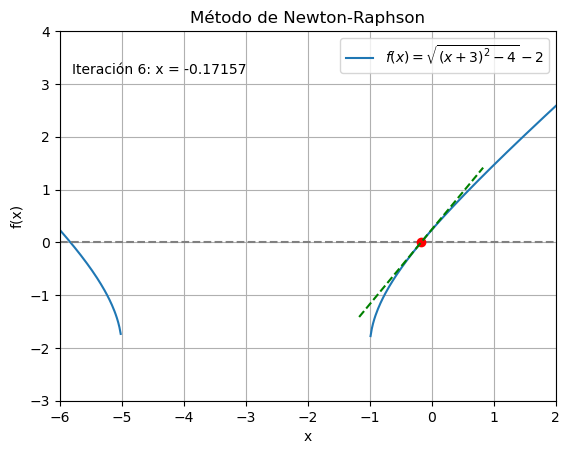

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.optimize import newton

# === Definir función y derivada ===
def f(x):
    return np.sqrt((x + 3)**2 - 4) - 2

def f_prime(x):
    return (x + 3) / np.sqrt((x + 3)**2 - 4)

# === Generar puntos del método de Newton ===
x0 = 0
steps = [x0]

# Guardar iteraciones
for _ in range(6):
    x_n = steps[-1]
    x_next = x_n - f(x_n) / f_prime(x_n)
    steps.append(x_next)

# === Preparar el gráfico base ===
x_vals = np.linspace(-6, 2, 400)
y_vals = f(x_vals)

fig, ax = plt.subplots()
ax.plot(x_vals, y_vals, label=r"$f(x) = \sqrt{(x+3)^2 - 4} - 2$")
ax.axhline(0, color='gray', linestyle='--')
ax.set_xlim(-6, 2)
ax.set_ylim(-3, 4)
ax.set_title("Método de Newton-Raphson")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.grid(True)
ax.legend()

# Elementos actualizables
punto, = ax.plot([], [], 'ro', label='Aproximación')
tangente, = ax.plot([], [], 'g--', label='Tangente')
texto = ax.text(-5.8, 3.2, '', fontsize=10)

# === Función para actualizar cada frame ===
def update(frame):
    x = steps[frame]
    y = f(x)
    punto.set_data([x], [y])
    
    # Tangente
    m = f_prime(x)
    x_tan = np.linspace(x - 1, x + 1, 100)
    y_tan = m * (x_tan - x) + y
    tangente.set_data(x_tan, y_tan)

    texto.set_text(f"Iteración {frame}: x = {x:.5f}")
    return punto, tangente, texto

# === Crear y guardar animación ===
ani = FuncAnimation(fig, update, frames=len(steps), interval=1000, blit=True)

# Guardar como .gif
ani.save(r"C:\Users\PcUser\OneDrive - Escuela Politécnica Nacional\Escritorio\Miguel Robles\4to\Metodos_ numericos\Laboratorios\LAboratorios grupales\lab2\newton_animacion.gif", writer=PillowWriter(fps=1))



print("✅ Animación guardada como 'newton_animacion.gif'")